# 使用torch.nn实现线性回归

In [2]:
%matplotlib inline
import torch
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import random

## 1 生成数据集

In [3]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.tensor(np.random.normal(0, 1, (num_examples, num_inputs)), dtype=torch.float)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float) # 加入一定的噪声

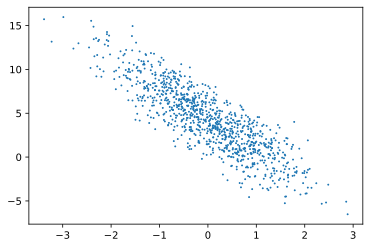

In [4]:
# 设置矢量图
%config InlineBackend.figure_format = 'svg'
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)

## 2 读取数据

In [5]:
lr = 0.03
import torch.utils.data as Data
import torch.nn as nn
batch_size = 10
# 将训练数据的特征和标签组合
dataset = Data.TensorDataset(features, labels)
# 把dataset 放入 DataLoader
data_iter = Data.DataLoader(
    dataset = dataset,
    batch_size = batch_size,
    shuffle = True,
    num_workers=2)

## 3 定义模型

In [6]:
class LinearNet(nn.Module):
    def __init__(self, n_feature):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(n_feature, 1)
        
# forward 定义前向传播
    def forward(self, x):
        y = self.linear(x)
        return y

net = LinearNet(num_inputs)
net

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)

In [7]:
# 其余几种写法
#写法一
# net = nn.Sequential(
# nn.Linear(num_inputs, 1)
# 此处可以添加其它层
# ）
# 写法二
# net = nn.Sequential()
# net.add_module('linear', nn.Linear(num_inputs, 1))
# net.add_module………
# 写法三
# from collections import OrderedDict
# net = nn.Sequential(OrderedDict([
# ('linear', nn.Linear(num_inputs, 1))
# # ……]))

## 4 初始化模型参数

In [23]:
from torch.nn import init

init.normal_(net.linear.weight, mean=0, std=0.01)
init.constant_(net.linear.bias, val=0)  # 也可以直接修改bias的data:net[0].bias.data.fill_(0)

Parameter containing:
tensor([0.], requires_grad=True)

## 5 定义损失函数

In [24]:
loss = nn.MSELoss()

## 6 定义优化算法

In [25]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.001)  #梯度下降的学习率指定为0.03
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
# 可以为不同的子网络设置不同的学习率
# optimizer =optim.SGD([
# # 如果不指定学习率，则用默认的最外层学习率
# {'params': net.subnet1.parameters()}, # lr=0.03
# {'params': net.subnet2.parameters(), 'lr': 0.01}
# ], lr=0.03)

NameError: name 'net_Momentum' is not defined

## 7 训练模型

In [26]:
num_epochs = 20
SGD_loss = []
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        output = net(X)
        l = loss(output, y.view(output.size()))
        optimizer.zero_grad() #梯度梯度清零 等价于net.zero_grad()
        l.backward()
        optimizer.step()
    SGD_loss.append(l.item())
    print('epoch %d, loss:%f'%(epoch, l.item()))

epoch 1, loss:11.413531
epoch 2, loss:38.070763
epoch 3, loss:12.111941
epoch 4, loss:12.973526
epoch 5, loss:3.292607
epoch 6, loss:5.135568
epoch 7, loss:1.167105
epoch 8, loss:1.152418
epoch 9, loss:0.589858
epoch 10, loss:0.801614
epoch 11, loss:0.567152
epoch 12, loss:0.400798
epoch 13, loss:0.194735
epoch 14, loss:0.109754
epoch 15, loss:0.104405
epoch 16, loss:0.050306
epoch 17, loss:0.029953
epoch 18, loss:0.041847
epoch 19, loss:0.028199
epoch 20, loss:0.016072


In [21]:
for item in net.parameters():
    print("item: ", item)

item:  Parameter containing:
tensor([[ 2.0001, -3.4001]], requires_grad=True)
item:  Parameter containing:
tensor([4.1994], requires_grad=True)


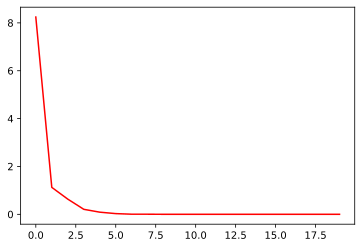

In [22]:
plt.plot(np.arange(num_epochs), SGD_loss, c='r')